In [25]:
#import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [26]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 105)

## Data Ingestion

In [27]:
! pip install kagglehub --quiet
import kagglehub
from pathlib import Path
path = kagglehub.dataset_download("abrambeyer/openintro-possum")
possum = Path('possum.csv')
path_full = path / possum

print("Path to dataset files:", path)

df = pd.read_csv(path_full)
df.head(50)


Path to dataset files: C:\Users\ncc\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


## Preliminary Data Analysis

In [28]:
df.head(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [29]:
df.tail(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
94,95,7,other,m,4.0,91.6,56.6,88.5,37.5,64.5,45.4,14.9,27.0,31.0
95,96,7,other,m,4.0,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0
96,97,7,other,m,3.0,91.0,53.1,86.0,38.0,63.8,46.0,14.5,25.0,31.5
97,98,7,other,m,5.0,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0
98,99,7,other,f,3.0,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [30]:
df_copy = df.copy()
df.set_index("case", inplace=True)

In [31]:
#Print the basic information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.4+ KB


In [32]:
df.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


## Data Cleaning

In [33]:
#From the basic information we can see some missing data, after much delibration, I decided to drop the missing data since they are minute and will not affect the datadset if droped
df.dropna(inplace=True)

In [34]:
df.duplicated().sum()

np.int64(0)

## Descriptive Data Analysis

In [35]:
def create_descriptive_df(data): 
    """  Generate descriptive statistics for numeric columns in a DataFrame.
    This function calculates common descriptive statistics such as count, mean, 
    median, mode, minimum, maximum, variance, standard deviation, quartiles, 
    interquartile range (IQR), skewness, and kurtosis for each numeric column 
    in the input DataFrame. Results are returned as a DataFrame with statistics 
    as rows and columns corresponding to numeric columns in the input.
    Parameters:
    data : DataFrame
        Input DataFrame containing numeric and/or non-numeric columns.

    Returns: 
    DataFrame
        Descriptive statistics with the following rows:
        - Count : Number of observations
        - Mean : Arithmetic mean
        - Median : Median value
        - Mode : Most frequent value
        - Min : Minimum value
        - Max : Maximum value
        - Range : Difference between Max and Min
        - Var : Variance
        - STD : Standard deviation
        - Q1 : 25th percentile
        - Q3 : 75th percentile
        - IQR : Interquartile range (Q3 - Q1)
        - Skew : Skewness of the distribution
        - Kurt : Kurtosis of the distribution
        """
    count = {}
    mean = {}
    median = {}
    mode = {}
    Min_val ={}
    Max_val = {}
    Range ={}
    Varriance = {}
    Standard_Deviation ={}
    q1={}
    q3={}
    q3_q1={}
    Skewnwss ={}
    Kurtosis = {}
    for col in data:
        if pd.api.types.is_numeric_dtype(data[col]):
            count[col] = round(len(data[col]),1)
            mean[col] = round(data[col].mean(),1)
            median[col] = round(data[col].median(),1)
            mode_result = stats.mode(data[col], keepdims=False)
            mode[col] = round(mode_result.mode,1)
            Min_val[col] = round(data[col].min(),1)
            Max_val[col] = round(data[col].max(),1)
            Range[col] = Max_val[col] - Min_val[col] 
            Varriance[col] = round(data[col].var(),1)
            Standard_Deviation[col] = round(data[col].std(),1)
            q1[col] = round(data[col].quantile(0.25),1)
            q3[col] = round(data[col].quantile(0.75),1)
            q3_q1[col] =  q3[col] - q1[col] 
            Skewnwss[col] = round(data[col].skew(),1)
            Kurtosis[col] = round(data[col].kurtosis(),1)

    dict_list = [count,mean,median,mode, Min_val, Max_val, Range,Varriance, Standard_Deviation,q1,q3,q3_q1,Skewnwss,Kurtosis]
    data_descriptive  = pd.DataFrame(dict_list, index=["Count", "Mean", "Median", "Mode", "Min", "Max", "Range", "Var","STD", "Q1", "Q2", "IQR","Skew", "Kurt"])
    return data_descriptive 

## Dataset

In [36]:
print("\n =========\t\t\tDescriptive Analysis For the Possum Dataset.\t\t\t=========")
create_descriptive_df(df)


 =========			Descriptive Analysis For the Possum Dataset.			=========


,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
Count,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0
Mean,3.7,3.8,92.7,57.0,87.3,37.0,68.4,48.1,15.1,27.1,32.6
Median,4.0,3.0,92.9,56.4,88.0,37.0,67.9,46.8,14.9,27.0,32.5
Mode,1.0,3.0,93.3,57.6,89.0,38.0,73.2,44.9,14.5,28.0,32.0
Min,1.0,1.0,82.5,50.0,75.0,32.0,60.3,41.3,12.8,22.0,25.0
Max,7.0,9.0,103.1,68.6,96.5,43.0,77.9,56.2,17.8,32.0,40.0
Range,6.0,8.0,20.6,18.6,21.5,11.0,17.6,14.9,5.0,10.0,15.0
Var,5.6,3.7,12.4,9.6,17.6,3.9,19.5,16.5,1.1,4.1,7.4
STD,2.4,1.9,3.5,3.1,4.2,2.0,4.4,4.1,1.1,2.0,2.7
Q1,1.0,2.0,90.7,55.0,84.5,36.0,64.5,44.8,14.4,25.5,31.0


## from the Information above:
1. We have 101 observation
2. The average age is 3.82 and the age at the center of the dataset is 3 and most of the observation have the age of 3
3. The average size is 87.3, the median is 88 and most observation have the size of 89.
4. Most features are normal distribution since their mean, median, mode are nearly equal.

In [37]:
df.head(5)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0



After using the descibe function on the dataset to get a basic statistics on the whole dataset, we are going to get the descriptive analysis base on the gender, location and site.

## Gender

In [38]:
df["sex"].value_counts()

sex
m    59
f    42
Name: count, dtype: int64

In [39]:
df_male = df[df["sex"] == "m"]
df_female = df[df["sex"] == "f"]

In [40]:
df_male.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
13,1,Vic,m,5.0,95.1,59.9,89.5,36.0,71.0,49.8,15.8,27.0,32.0
14,1,Vic,m,3.0,95.4,57.6,91.5,36.0,74.3,53.7,15.1,28.0,31.5
15,1,Vic,m,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0


In [41]:
print("\n =========\t\t\tDescriptive Analysis For the Male Possum.\t\t\t=========")
create_descriptive_df(df_male)


 =========			Descriptive Analysis For the Male Possum.			=========


,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
Count,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0
Mean,4.2,3.7,93.1,57.2,86.7,37.0,67.9,47.7,15.2,26.9,32.4
Median,5.0,3.0,93.3,56.6,86.0,36.5,66.5,46.2,15.0,27.0,32.0
Mode,1.0,3.0,89.5,56.0,85.0,38.0,65.6,44.9,15.0,27.0,32.0
Min,1.0,1.0,82.5,50.0,77.0,32.0,62.0,41.7,12.8,22.0,27.0
Max,7.0,8.0,103.1,68.6,96.0,43.0,75.0,56.2,17.8,32.0,38.0
Range,6.0,7.0,20.6,18.6,19.0,11.0,13.0,14.5,5.0,10.0,11.0
Var,5.5,3.6,16.5,11.6,17.4,4.3,15.9,15.9,1.1,4.5,6.6
STD,2.4,1.9,4.1,3.4,4.2,2.1,4.0,4.0,1.0,2.1,2.6
Q1,2.0,2.0,90.7,55.0,84.0,35.8,64.5,44.8,14.5,25.5,30.8


In [42]:
print("\n =========\t\t\tDescriptive Analysis For the Female Possum.\t\t\t=========")
create_descriptive_df(df_female)


 =========			Descriptive Analysis For the Female Possum.			=========


,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
Count,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0
Mean,3.0,4.0,92.2,56.6,88.0,37.1,69.1,48.8,14.8,27.3,32.9
Median,2.0,3.5,92.5,56.4,88.8,37.8,70.4,50.8,14.8,28.0,33.0
Mode,1.0,3.0,90.0,56.3,89.0,38.0,72.8,46.0,14.0,28.0,34.0
Min,1.0,1.0,84.7,51.5,75.0,32.0,60.3,41.3,13.0,23.0,25.0
Max,7.0,9.0,96.9,67.7,96.5,41.0,77.9,53.9,17.4,31.0,40.0
Range,6.0,8.0,12.2,16.2,21.5,9.0,17.6,12.6,4.4,8.0,15.0
Var,5.0,3.9,6.4,6.8,17.3,3.4,24.1,17.0,1.1,3.5,8.6
STD,2.2,2.0,2.5,2.6,4.2,1.9,4.9,4.1,1.0,1.9,2.9
Q1,1.0,3.0,91.1,55.1,85.6,36.0,64.8,45.2,14.0,26.0,31.5


Base on df_male_descriptive and df_female_descriptive dataframes we can see that:

1. The percentage difference between the number males and female is: 16% i.e there were more male than female
2. With regards to age, the maximum age of female is 9 while that of male is 8
3. The female are bigger than the male, though the male have bigger heads than the female
4. The male have bigger eyes and skull.
5. The female have bigger belly and chest than the male.

## Location

In [43]:
df_vic = df[df["Pop"] == "Vic"]
df_other = df[df["Pop"] == "other"]

In [44]:
df_vic.head(10)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0


In [45]:
df_other.head(10)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
47,3,other,m,2.0,90.1,54.8,89.0,37.5,66.0,45.5,15.0,25.0,33.0
48,3,other,m,5.0,98.6,63.2,85.0,34.0,66.9,44.9,17.0,28.0,35.0
49,3,other,m,4.0,95.4,59.2,85.0,37.0,69.0,45.0,15.9,29.5,35.5
50,3,other,f,5.0,91.6,56.4,88.0,38.0,65.0,47.2,14.9,28.0,36.0
51,3,other,f,5.0,95.6,59.6,85.0,36.0,64.0,43.9,17.4,28.0,38.5
52,3,other,m,6.0,97.6,61.0,93.5,40.0,67.9,44.3,15.8,28.5,32.5
53,3,other,f,3.0,93.1,58.1,91.0,38.0,67.4,46.0,16.5,26.0,33.5
54,4,other,m,7.0,96.9,63.0,91.5,43.0,71.3,46.0,17.5,30.0,36.5
55,4,other,m,2.0,103.1,63.2,92.5,38.0,72.5,44.9,16.4,30.5,36.0


In [46]:
print("\n =========\t\t\tDescriptive Analysis For Possum found in Victoria\t\t\t=========")
create_descriptive_df(df_vic)


 =========			Descriptive Analysis For Possum found in Victoria			=========


,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
Count,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0
Mean,1.2,4.0,92.9,56.8,87.9,36.0,72.4,52.5,14.9,27.6,32.8
Median,1.0,3.0,93.3,56.3,89.0,36.0,72.8,52.2,14.9,28.0,33.0
Mode,1.0,3.0,94.4,57.6,89.5,36.0,73.2,52.0,14.2,28.0,32.0
Min,1.0,1.0,84.7,51.5,75.0,32.0,62.7,49.4,13.0,23.0,25.0
Max,2.0,9.0,96.3,67.7,96.5,39.5,77.9,56.2,16.4,31.0,40.0
Range,1.0,8.0,11.6,16.2,21.5,7.5,15.2,6.8,3.4,8.0,15.0
Var,0.2,4.5,6.1,6.2,21.1,3.1,6.9,2.2,0.6,3.2,7.3
STD,0.4,2.1,2.5,2.5,4.6,1.8,2.6,1.5,0.8,1.8,2.7
Q1,1.0,2.0,91.7,55.4,85.2,35.0,71.1,51.5,14.4,27.0,31.5


In [47]:
print("\n =========\t\t\tDescriptive Analysis For Possum found in Other Location(New South Wales or Queensland).\t\t\t=========")
create_descriptive_df(df_other)


 =========			Descriptive Analysis For Possum found in Other Location(New South Wales or Queensland).			=========


,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
Count,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
Mean,5.5,3.7,92.6,57.1,86.8,37.9,65.4,44.9,15.2,26.6,32.5
Median,6.0,3.0,92.4,56.4,86.5,38.0,65.2,44.9,15.0,26.0,32.5
Mode,7.0,3.0,89.5,56.0,85.0,38.0,65.6,44.9,15.0,25.0,33.0
Min,3.0,1.0,82.5,50.0,80.5,34.0,60.3,41.3,12.8,22.0,27.0
Max,7.0,7.0,103.1,68.6,96.0,43.0,73.2,48.0,17.8,32.0,39.0
Range,4.0,6.0,20.6,18.6,15.5,9.0,12.9,6.7,5.0,10.0,12.0
Var,1.9,3.1,17.2,12.3,14.8,2.9,7.7,2.5,1.5,4.4,7.7
STD,1.4,1.7,4.1,3.5,3.9,1.7,2.8,1.6,1.2,2.1,2.8
Q1,5.0,3.0,90.0,54.8,84.0,36.5,63.3,43.8,14.4,25.1,30.6


In [48]:
df.groupby("Pop")["sex"].value_counts()

Pop    sex
Vic    f      23
       m      20
other  m      39
       f      19
Name: count, dtype: int64

From the Information above:
1. The number of possum found in other location(New South Wales or Queensland) is more than that found in Victoria
2. The average age for possum in other location is 3.7 and that of possum found in victoria is 4
3. The most found possum age found in both location is 3.
4. The possum found in Victoria are bigger than the possum found in other location, and since we have established that tthe females are bigger than the male, we can infer that more females where found in Victoria
5. 

## Site

In [49]:
df.groupby("site").apply(create_descriptive_df)

C:\Users\ncc\AppData\Local\Temp\ipykernel_9136\1959573670.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("site").apply(create_descriptive_df)


site   age  hdlngth  skullw  totlngth  taill  footlgth  earconch  \
site                                                                            
1    Count   33.0  33.0     33.0    33.0      33.0   33.0      33.0      33.0   
     Mean     1.0   4.2     93.7    57.2      89.7   36.4      73.0      52.6   
     Median   1.0   4.0     93.8    56.8      89.5   36.0      73.2      52.4   
     Mode     1.0   3.0     92.5    57.6      89.5   36.0      73.2      51.8   
     Min      1.0   1.0     90.5    54.1      84.0   33.5      68.0      49.8   
     Max      1.0   9.0     96.3    67.7      96.5   39.5      77.9      56.2   
     Range    0.0   8.0      5.8    13.6      12.5    6.0       9.9       6.4   
     Var      0.0   4.6      2.3     6.3       8.9    2.6       4.5       1.9   
     STD      0.0   2.1      1.5     2.5       3.0    1.6       2.1       1.4   
     Q1       1.0   3.0     92.8    55.7      89.0   35.5      71.5      51.8   
     Q2       1.0   6.0     94.8    58.1      91.5   37.0      74.3      53.4   
     IQR      0.0   3.0      2.0     2.4       2.5    1.5       2.8       1.6   
     Skew     0.0   0.7     -0.2     2.3      -0.0    0.4       0.1       0.5   
     Kurt     0.0  -0.1     -0.7     8.7       0.1   -0.5       0.3       0.6   
2    Count   10.0  10.0     10.0    10.0      10.0   10.0      10.0      10.0   
     Mean     2.0   3.4     90.2    55.6      82.0   34.6      70.6      52.2   
     Median   2.0   3.0     90.6    55.6      81.8   35.0      71.4      52.0   
     Mode     2.0   2.0     84.7    51.5      81.0   32.0      71.2      52.0   
     Min      2.0   1.0     84.7    51.5      75.0   32.0      62.7      49.4   
     Max      2.0   7.0     94.4    59.3      88.0   36.5      74.3      55.5   
     Range    0.0   6.0      9.7     7.8      13.0    4.5      11.6       6.1   
     Var      0.0   4.3      9.8     4.4      15.8    2.4      11.0       3.7   
     STD      0.0   2.1      3.1     2.1       4.0    1.6       3.3       1.9   
     Q1       2.0   2.0     89.5    54.8      80.6   34.0      69.3      51.2   
     Q2       2.0   3.8     92.1    56.0      84.9   35.5      72.6      53.3   
     IQR      0.0   1.8      2.6     1.2       4.3    1.5       3.3       2.1   
     Skew     0.0   1.1     -0.7    -0.1      -0.4   -0.8      -1.6       0.1   
     Kurt     0.0   0.2     -0.0     1.4      -0.3   -0.4       3.2      -0.4   
3    Count    7.0   7.0      7.0     7.0       7.0    7.0       7.0       7.0   
     Mean     3.0   4.3     94.6    58.9      88.1   37.2      66.6      45.3   
     Median   3.0   5.0     95.4    59.2      88.0   37.5      66.9      45.0   
     Mode     3.0   5.0     90.1    54.8      85.0   38.0      64.0      43.9   
     Min      3.0   2.0     90.1    54.8      85.0   34.0      64.0      43.9   
     Max      3.0   6.0     98.6    63.2      93.5   40.0      69.0      47.2   
     Range    0.0   4.0      8.5     8.4       8.5    6.0       5.0       3.3   
     Var      0.0   1.9      9.7     7.9      11.2    3.5       3.0       1.2   
     STD      0.0   1.4      3.1     2.8       3.3    1.9       1.7       1.1   
     Q1       3.0   3.5     92.4    57.2      85.0   36.5      65.5      44.6   
     Q2       3.0   5.0     96.6    60.3      90.0   38.0      67.6      45.8   
     IQR      0.0   1.5      4.2     3.1       5.0    1.5       2.1       1.2   
     Skew     0.0  -0.7     -0.2     0.0       0.6   -0.4      -0.2       0.7   
     Kurt     0.0  -0.3     -1.3    -0.2      -0.9    1.1      -0.7       0.5   
4    Count    7.0   7.0      7.0     7.0       7.0    7.0       7.0       7.0   
     Mean     4.0   3.3     97.6    61.7      92.2   39.7      68.9      45.8   
     Median   4.0   3.0     96.9    62.8      92.5   39.0      68.7      46.0   
     Mode     4.0   2.0     91.3    57.7      88.0   38.0      63.1      44.5   
     Min      4.0   2.0     91.3    57.7      88.0   38.0      63.1      44.5   
     Max      4.0   7.0    103.1    64.2    

In [50]:
df.groupby("site")["sex"].value_counts()

site  sex
1     f      19
      m      14
2     m       6
      f       4
3     m       4
      f       3
4     m       5
      f       2
5     m       7
      f       6
6     m       9
      f       4
7     m      14
      f       4
Name: count, dtype: int64

From the Information above :
1. Site 1 has the higest number of possum found at 33 possum, followed by Site 7 at 18 possum
2. Site 3 and 4 are the lowest at 7 possum found respectively.
3. we can also note that, more female possum are found in site 1 while in site 7 more male. are found.
 

## Exploratory Data Analysis

In [ ]:

# for col in df:
#       if pd.api.types.is_numeric_dtype(df[col]):
#         plt.figure(figsize=(3,4))
#         sns.histplot(df[col],kde=True)
#         plt.ylabel("Frequency")
#         plt.title(f"Histogram Distribution of {df[col]}")
#         plt.show()

# sns.histplot(df["age"], kde=True) 
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col].tolist()):
        
        col
    


           
          
       
    

In [95]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [103]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(col)
    


site
age
hdlngth
skullw
totlngth
taill
footlgth
earconch
eye
chest
belly


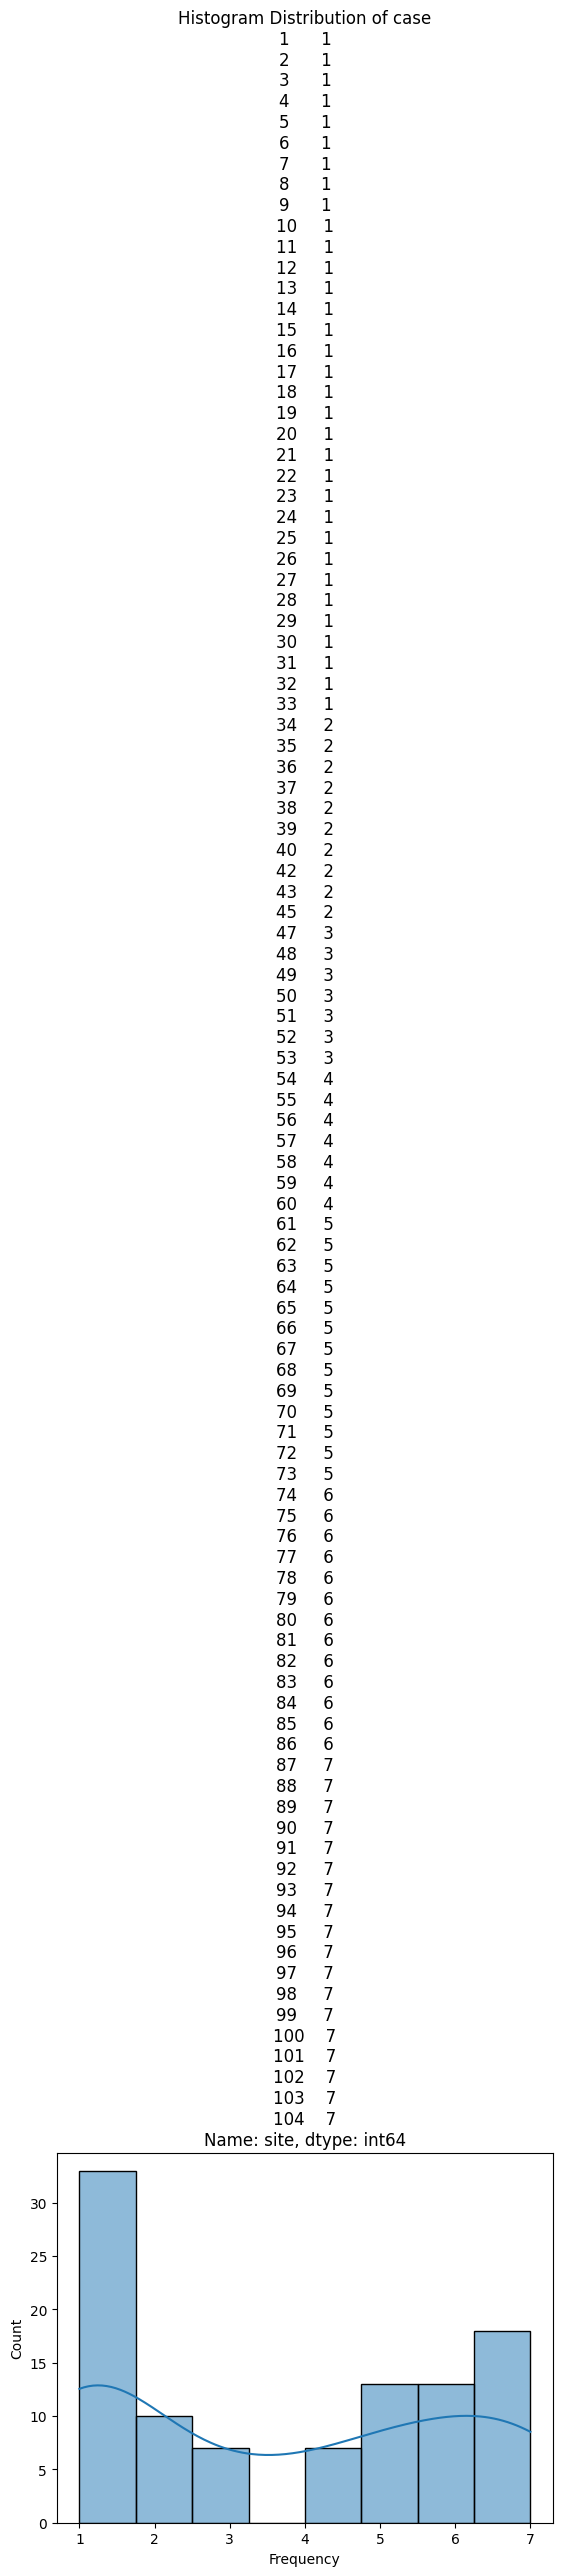

<Axes: title={'center': 'Histogram Distribution of case\n1      1\n2      1\n3      1\n4      1\n5      1\n6      1\n7      1\n8      1\n9      1\n10     1\n11     1\n12     1\n13     1\n14     1\n15     1\n16     1\n17     1\n18     1\n19     1\n20     1\n21     1\n22     1\n23     1\n24     1\n25     1\n26     1\n27     1\n28     1\n29     1\n30     1\n31     1\n32     1\n33     1\n34     2\n35     2\n36     2\n37     2\n38     2\n39     2\n40     2\n42     2\n43     2\n45     2\n47     3\n48     3\n49     3\n50     3\n51     3\n52     3\n53     3\n54     4\n55     4\n56     4\n57     4\n58     4\n59     4\n60     4\n61     5\n62     5\n63     5\n64     5\n65     5\n66     5\n67     5\n68     5\n69     5\n70     5\n71     5\n72     5\n73     5\n74     6\n75     6\n76     6\n77     6\n78     6\n79     6\n80     6\n81     6\n82     6\n83     6\n84     6\n85     6\n86     6\n87     7\n88     7\n89     7\n90     7\n91     7\n92     7\n93     7\n94     7\n95     7\n96     7\n97     7\n98 

In [74]:
create_visualization(df)

## Outlier Dectection

In [52]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [54]:
df_numerical = df.iloc[0:, 3:]
df_numerical.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,
1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [55]:
df_numerical.quantile([0.25, 0.75])

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0.25,2.0,90.7,55.0,84.5,36.0,64.5,44.8,14.4,25.5,31.0
0.75,5.0,94.8,58.1,90.0,38.0,72.5,52.0,15.7,28.0,34.0


In [ ]:
# def get_outlier(colunm):

In [ ]:
# df["Outlier_lowerband"] = df_numerical.quantile(0.25) - 1.5(df_numerical.quantile(0.75)- df_numerical.quantile(0.25))
# df["Outlier_upperband"] = df_numerical.quantile(0.75) - 1.5(df_numerical.quantile(0.75)- df_numerical.quantile(0.25))

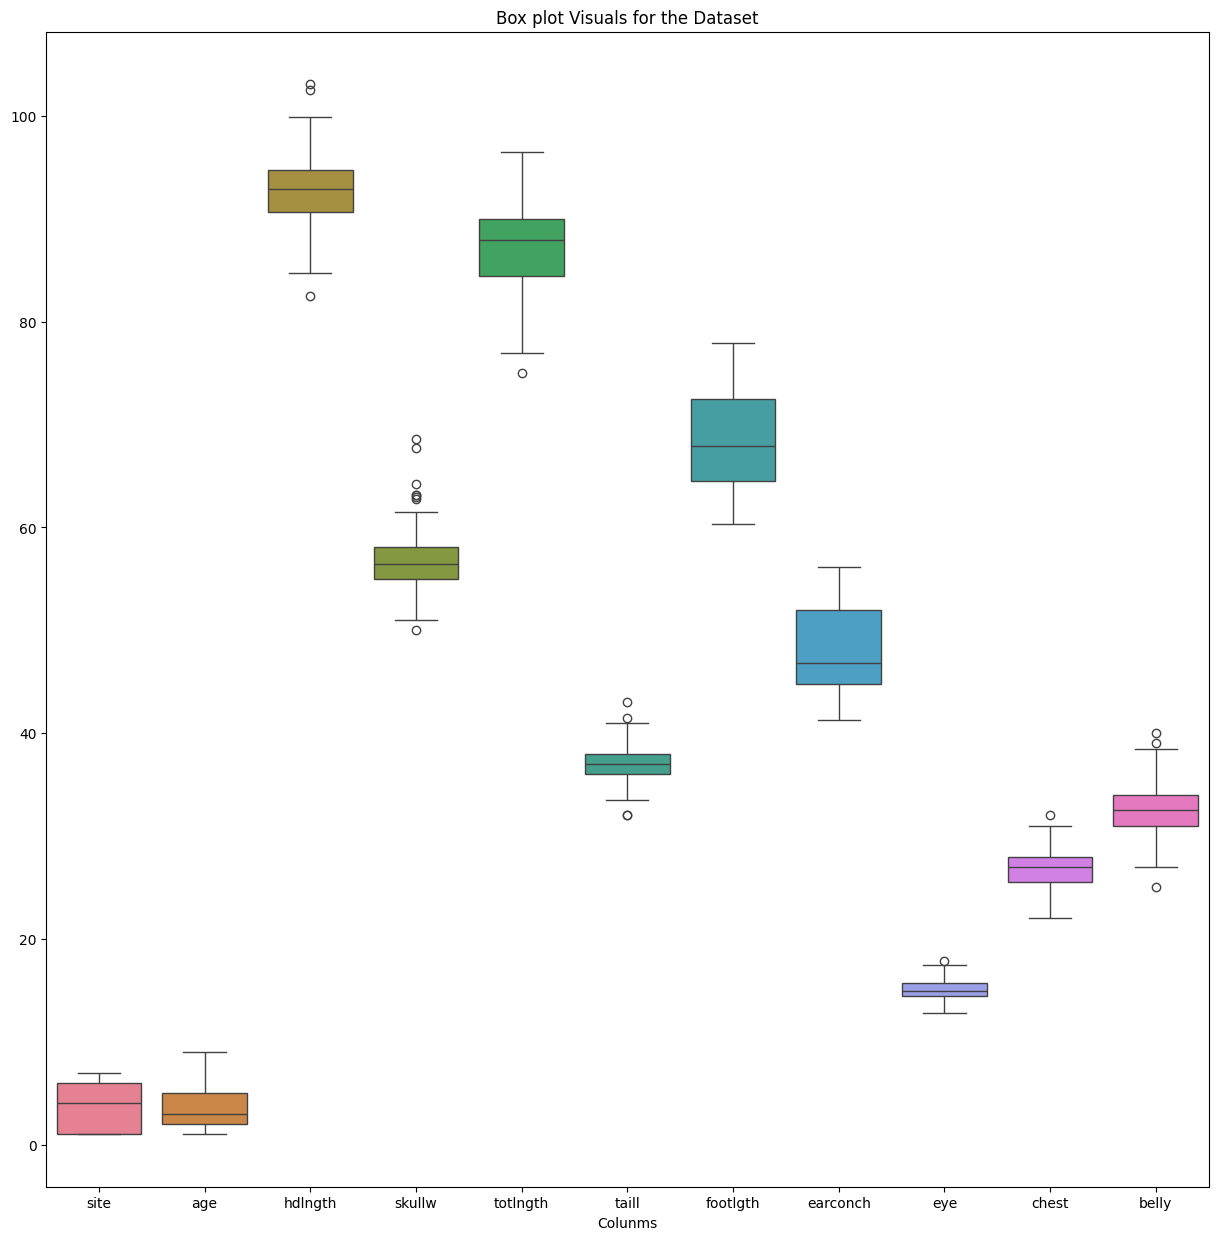

In [67]:
plt.figure(figsize=(15,15))
sns.boxplot(df)
plt.xlabel("Colunms")
plt.title("Box plot Visuals for the Dataset")
plt.show()


<Axes: xlabel='case', ylabel='totlngth'>

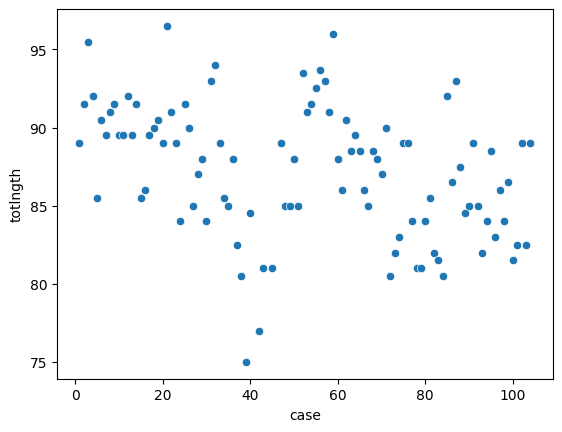

In [104]:
sns.scatterplot(df["totlngth"])

From the visual representation above, tnhe following columns have outliers:
1. hdlngth
2. skullw
3. totlngth
4. taill
5. eye
6. chest
7. belly
